##从iris数据集入门scikit-learn
iris数据集是由三种鸢尾花，各50组数据构成的数据集。每个样本包含4个特征，分别为萼片(sepals)的长和宽、花瓣(petals)的长和宽。

![](Image/iris_petal_sepal.jpg)

In [1]:
#from IPython.diasplay import Image
#Image(filename="Image/iris_petal_sepal.jpg", width=400, height=432)

##1. 载入iris数据

你还可以通过python的csv模块，或者NumPy的loadtxt函数，或者Pandas的read_csv()函数读取从[UCI Iris dataset](http://archive.ics.uci.edu/ml/datasets/Iris)下载的csv文件。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [3]:
print iris.feature_names
print iris.target_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


在scikit-learn中对数据有如下要求：
- 特征和标签要用分开的对象存储
- 特征和标签要是数字
- 特征和标签都要使用numpy的array来存储

In [4]:
print type(iris.data)
print type(iris.target)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [5]:
print iris.data.shape
print iris.target.shape

(150, 4)
(150,)


In [6]:
# store features matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

###回顾iris数据集

In [7]:
from IPython.display import HTML
HTML('<iframe src=http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data width=300 height=200></iframe>')

###绘制iris的2d图

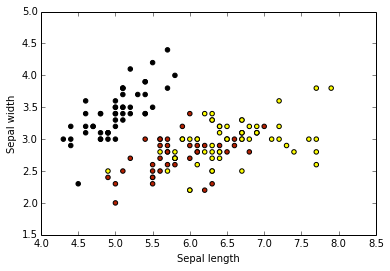

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
X_sepal = X[:, :2]
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap=plt.cm.gnuplot)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

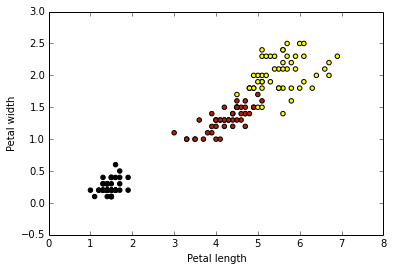

In [9]:
X_petal = X[:, 2:4]
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap=plt.cm.gnuplot)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

##2. 使用K近邻进行分类

KNN分类的基本步骤：
1. 选择K的值
2. 在训练数据集中搜索K个距离最近的观测值
3. 使用最多的那个标签作为未知数据的预测

下面给出KNN的演示图例，
分别是训练数据、K=1时的KNN分类图、K=5时的KNN分类图
![Example training data](Image/Data3classes.png)
![KNN classification map(K=1)](Image/Map1NN.png)
![KNN classification map(K=5)](Image/Map5NN.png)

###scikit-learn进行模型匹配的4个一般步骤

###第一步：载入你要使用的模型类

In [10]:
from sklearn.neighbors import KNeighborsClassifier

###第二步：实例化分类器

In [11]:
# looking for the one nearest neighbor
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')


###第三步：用数据来拟合模型（进行模型的训练）

In [13]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

###第四步：对新的观测值进行预测

In [14]:
knn.predict([3, 5, 4, 2])

array([2])

In [15]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

###使用不同的K值

In [16]:
knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X, y)

knn5.predict(X_new)

array([1, 1])

###依照同样的流程，使用不同的分类模型

In [17]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])